In [28]:
import pandas as pd

In [29]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-01-06 11:16:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  26.7KB/s    in 2.7s    

2019-01-06 11:16:37 (26.7 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [30]:
df = pd.read_csv('FuelConsumption.csv')

In [31]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [32]:
df2 = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [33]:
df2.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881,256.228679
std,1.415895,1.797447,3.485595,63.372304
min,1.000000,3.000000,4.700000,108.000000
25%,2.000000,4.000000,9.000000,207.000000
50%,3.400000,6.000000,10.900000,251.000000
75%,4.300000,8.000000,13.350000,294.000000
max,8.400000,12.000000,25.800000,488.000000


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df2[['ENGINESIZE']]

In [36]:
Y = df2['CO2EMISSIONS']

In [37]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.2)

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
from sklearn import linear_model

In [61]:
poly = PolynomialFeatures(degree = 4)

In [62]:
train_x_poly = poly.fit_transform(train_x)

In [63]:
train_x_poly

array([[1.0000000e+00, 5.4000000e+00, 2.9160000e+01, 1.5746400e+02,
        8.5030560e+02],
       [1.0000000e+00, 6.8000000e+00, 4.6240000e+01, 3.1443200e+02,
        2.1381376e+03],
       [1.0000000e+00, 1.6000000e+00, 2.5600000e+00, 4.0960000e+00,
        6.5536000e+00],
       ...,
       [1.0000000e+00, 3.8000000e+00, 1.4440000e+01, 5.4872000e+01,
        2.0851360e+02],
       [1.0000000e+00, 1.5000000e+00, 2.2500000e+00, 3.3750000e+00,
        5.0625000e+00],
       [1.0000000e+00, 1.8000000e+00, 3.2400000e+00, 5.8320000e+00,
        1.0497600e+01]])

In [64]:
train_x

,ENGINESIZE
345,5.4
75,6.8
809,1.6
795,1.6
910,5.7
841,4.0
729,3.5
502,1.6
147,3.6
242,4.3


In [65]:
lr = linear_model.LinearRegression()

In [66]:
lr.fit(train_x_poly,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
lr.coef_

array([ 0.        , 38.47698745,  0.20066494,  0.29789715, -0.05123125])

In [69]:
lr.intercept_

122.1018912661689

In [70]:
import matplotlib.pyplot as plt
import numpy as np

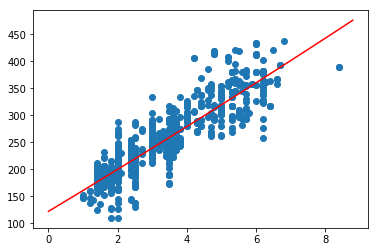

In [71]:
plt.scatter(train_x,train_y)
x = np.arange(0,9,0.2)
y = lr.intercept_+x*lr.coef_[1]+np.power(x,2)*lr.coef_[2]
plt.plot(x,y,'r')

In [72]:
test_x_poly = poly.fit_transform(test_x)

In [73]:
pred = lr.predict(test_x_poly)

In [74]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

In [75]:
r2_score(test_y,pred)

0.7202922550256842

In [76]:
mean_squared_error(test_y,pred)

918.4953952647018